In [ ]:
"""
==================================================
TIMESYNC AI RESEARCH - SMART TIMESHEET PRE-FILL
==================================================
Project: OrasSync 2.0 - Smart Timesheet Pre-fill Feature
Sprint: ML Research Phase
Current Week: 1
Date: February 16, 2026
Notebook: Feature Engineering

📊 PROJECT PHASES:
✅ Phase 1: Data Exploration (COMPLETED)
🔄 Phase 2: Feature Engineering (IN PROGRESS)
⬜ Phase 3: Random Forest Model Training
⬜ Phase 4: Model Evaluation
⬜ Phase 5: Production Integration

🎯 PHASE 2 DELIVERABLES:
🔄 Feature extraction (THIS NOTEBOOK)
⬜ Feature encoding & normalization
⬜ Training/test dataset creation
⬜ Feature importance analysis

Progress: 25% (1/4 tasks)

🎯 THIS NOTEBOOK'S OBJECTIVES:
1. Extract ML-ready features from timesheet data
2. Engineer pattern-based features (frequency, consistency)
3. Create temporal features (day-of-week encoding)
4. Build feature vectors for Random Forest training
5. Save processed dataset for model training

📚 NOTEBOOK STRUCTURE:
Part 1: Load Data & Feature Planning
Part 2: Temporal Feature Engineering
Part 3: Pattern Feature Engineering
Part 4: Feature Encoding & Normalization
Part 5: Dataset Creation & Export

✅ SUCCESS CRITERIA:
✅ Extract all required ML features
✅ Encode categorical variables properly
✅ Create balanced training dataset
✅ Save processed features for modeling
✅ Document feature definitions

==================================================
"""

In [1]:
# ==================================================
# INSTALL REQUIRED LIBRARIES
# ==================================================
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn -q
print("✅ Libraries installed!")
print("\n" + "=" * 80)

# ==================================================
# IMPORT LIBRARIES
# ==================================================
print("\n" + "=" * 80)
print("📚 IMPORTING LIBRARIES")
print("=" * 80)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n✅ All libraries imported successfully!")
print("=" * 80)

# ==================================================
# CREATE OUTPUT DIRECTORIES
# ==================================================
print("\n" + "=" * 80)
print("📁 CREATING OUTPUT DIRECTORIES")
print("=" * 80)

os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../results/features', exist_ok=True)

print("\n✅ Directories created:")
print("   - data/processed/ (for engineered features)")
print("   - results/features/ (for feature analysis)")
print("=" * 80)

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


✅ Libraries installed!


📚 IMPORTING LIBRARIES

✅ All libraries imported successfully!

📁 CREATING OUTPUT DIRECTORIES

✅ Directories created:
   - data/processed/ (for engineered features)
   - results/features/ (for feature analysis)


In [2]:
print("\n" + "=" * 80)
print("📚 PART 1: LOAD DATA & FEATURE PLANNING")
print("=" * 80)


📚 PART 1: LOAD DATA & FEATURE PLANNING


In [3]:
print("\n" + "=" * 80)
print("EXERCISE 1.1: Load Timesheet Data")
print("=" * 80)

print("\n⏱️ Loading dataset from data/timesheet_data_export.csv...")

# Load the data
df = pd.read_csv('../data/timesheet_data_export.csv')

# Convert date column
df['log_date'] = pd.to_datetime(df['log_date'])

print("\n✅ Dataset loaded successfully!")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print("=" * 80)
print(f"Total Records: {len(df)}")
print(f"Date Range: {df['log_date'].min()} to {df['log_date'].max()}")
print(f"Unique Users: {df['user_id'].nunique()}")
print(f"Unique Activities: {df['activity_id'].nunique()}")

print("\n📋 FIRST 5 RECORDS:")
print("=" * 80)
df.head()


EXERCISE 1.1: Load Timesheet Data

⏱️ Loading dataset from data/timesheet_data_export.csv...

✅ Dataset loaded successfully!

📊 DATASET OVERVIEW:
Total Records: 44
Date Range: 2026-02-10 00:00:00 to 2026-02-17 00:00:00
Unique Users: 4
Unique Activities: 7

📋 FIRST 5 RECORDS:


,tlog_id,user_id,activity_id,activity_name,activity_code,is_billable,log_date,start_time,end_time,total_hours
0,12,1,1,Development,DEV,1,2026-02-10,Thu Jan 01 1970 23:50:31 GMT+0800 (Philippine ...,Thu Jan 01 1970 23:51:11 GMT+0800 (Philippine ...,0.01
1,14,emp02,2,Meeting,MEET,1,2026-02-12,Thu Jan 01 1970 10:20:57 GMT+0800 (Philippine ...,Thu Jan 01 1970 10:21:17 GMT+0800 (Philippine ...,8.01
2,29,emp03,1,Development,DEV,1,2026-02-12,Thu Jan 01 1970 21:57:55 GMT+0800 (Philippine ...,Thu Jan 01 1970 21:58:32 GMT+0800 (Philippine ...,8.01
3,27,emp01,5,Email,EMAIL,0,2026-02-12,Thu Jan 01 1970 12:58:29 GMT+0800 (Philippine ...,Thu Jan 01 1970 13:00:33 GMT+0800 (Philippine ...,8.03
4,25,emp01,2,Meeting,MEET,1,2026-02-12,Thu Jan 01 1970 12:38:51 GMT+0800 (Philippine ...,Thu Jan 01 1970 12:39:36 GMT+0800 (Philippine ...,8.01


In [4]:
print("\n" + "=" * 80)
print("EXERCISE 1.2: ML Feature Engineering Plan")
print("=" * 80)

print("""
🎯 FEATURES TO ENGINEER FOR RANDOM FOREST:

1. TEMPORAL FEATURES (From log_date):
   ✓ day_of_week          → Day name (Monday, Tuesday, ...)
   ✓ day_of_week_encoded  → Numerical (0-6)
   ✓ hour_of_day          → Hour when activity started (0-23)
   ✓ month                → Month number (1-12)
   ✓ is_month_end         → Boolean (True if day >= 25)
   ✓ week_of_year         → Week number (1-52)

2. PATTERN FEATURES (Calculated from history):
   ✓ activity_frequency       → How often activity appears on this day
   ✓ avg_duration             → Average hours for this activity
   ✓ duration_consistency     → Stability of duration (1 - CV)
   ✓ recent_trend             → Change in occurrence (last week vs before)
   ✓ total_occurrences        → Total count in historical data

3. CONTEXTUAL FEATURES (From data):
   ✓ is_billable          → Binary (0 or 1)
   ✓ activity_id          → Activity identifier
   ✓ user_id_encoded      → User identifier (encoded)

4. TARGET VARIABLE:
   ✓ should_predict       → Binary: 1 if activity should be predicted, 0 otherwise
                            (Based on frequency threshold: freq >= 0.7)

📊 TOTAL FEATURES: 14
🎯 TARGET: should_predict (Binary Classification)
""")

print("=" * 80)


EXERCISE 1.2: ML Feature Engineering Plan

🎯 FEATURES TO ENGINEER FOR RANDOM FOREST:

1. TEMPORAL FEATURES (From log_date):
   ✓ day_of_week          → Day name (Monday, Tuesday, ...)
   ✓ day_of_week_encoded  → Numerical (0-6)
   ✓ hour_of_day          → Hour when activity started (0-23)
   ✓ month                → Month number (1-12)
   ✓ is_month_end         → Boolean (True if day >= 25)
   ✓ week_of_year         → Week number (1-52)

2. PATTERN FEATURES (Calculated from history):
   ✓ activity_frequency       → How often activity appears on this day
   ✓ avg_duration             → Average hours for this activity
   ✓ duration_consistency     → Stability of duration (1 - CV)
   ✓ recent_trend             → Change in occurrence (last week vs before)
   ✓ total_occurrences        → Total count in historical data

3. CONTEXTUAL FEATURES (From data):
   ✓ is_billable          → Binary (0 or 1)
   ✓ activity_id          → Activity identifier
   ✓ user_id_encoded      → User identifier (

In [5]:
print("\n" + "=" * 80)
print("📚 PART 2: TEMPORAL FEATURE ENGINEERING")
print("=" * 80)


📚 PART 2: TEMPORAL FEATURE ENGINEERING


In [6]:
print("\n" + "=" * 80)
print("EXERCISE 2.1: Extract Temporal Features")
print("=" * 80)

# Extract day of week
df['day_of_week'] = df['log_date'].dt.day_name()
df['day_of_week_encoded'] = df['log_date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Extract month
df['month'] = df['log_date'].dt.month

# Extract week of year
df['week_of_year'] = df['log_date'].dt.isocalendar().week

# Month-end indicator
df['is_month_end'] = (df['log_date'].dt.day >= 25).astype(int)

# Extract hour from start_time
def extract_hour(time_str):
    try:
        parts = str(time_str).split()
        if len(parts) >= 4:
            time_part = parts[4]
            hour = int(time_part.split(':')[0])
            return hour
    except:
        pass
    return 9  # Default to 9 AM if parsing fails

df['hour_of_day'] = df['start_time'].apply(extract_hour)

print("\n✅ Temporal features extracted!")
print("=" * 80)

print("\n📊 TEMPORAL FEATURES SUMMARY:")
print("=" * 80)
print(f"Day of Week Range: {df['day_of_week'].min()} to {df['day_of_week'].max()}")
print(f"Month Range: {df['month'].min()} to {df['month'].max()}")
print(f"Hour Range: {df['hour_of_day'].min()} to {df['hour_of_day'].max()}")
print(f"Month-End Records: {df['is_month_end'].sum()} ({(df['is_month_end'].sum()/len(df)*100):.1f}%)")

print("\n📋 SAMPLE OF TEMPORAL FEATURES:")
print("=" * 80)
df[['log_date', 'day_of_week', 'day_of_week_encoded', 'hour_of_day', 'month', 'is_month_end']].head(10)


EXERCISE 2.1: Extract Temporal Features

✅ Temporal features extracted!

📊 TEMPORAL FEATURES SUMMARY:
Day of Week Range: Friday to Tuesday
Month Range: 2 to 2
Hour Range: 0 to 23
Month-End Records: 0 (0.0%)

📋 SAMPLE OF TEMPORAL FEATURES:


,log_date,day_of_week,day_of_week_encoded,hour_of_day,month,is_month_end
0,2026-02-10,Tuesday,1,23,2,0
1,2026-02-12,Thursday,3,10,2,0
2,2026-02-12,Thursday,3,21,2,0
3,2026-02-12,Thursday,3,12,2,0
4,2026-02-12,Thursday,3,12,2,0
5,2026-02-12,Thursday,3,12,2,0
6,2026-02-12,Thursday,3,12,2,0
7,2026-02-12,Thursday,3,12,2,0
8,2026-02-12,Thursday,3,10,2,0
9,2026-02-12,Thursday,3,10,2,0



EXERCISE 2.2: Visualize Temporal Feature Distributions


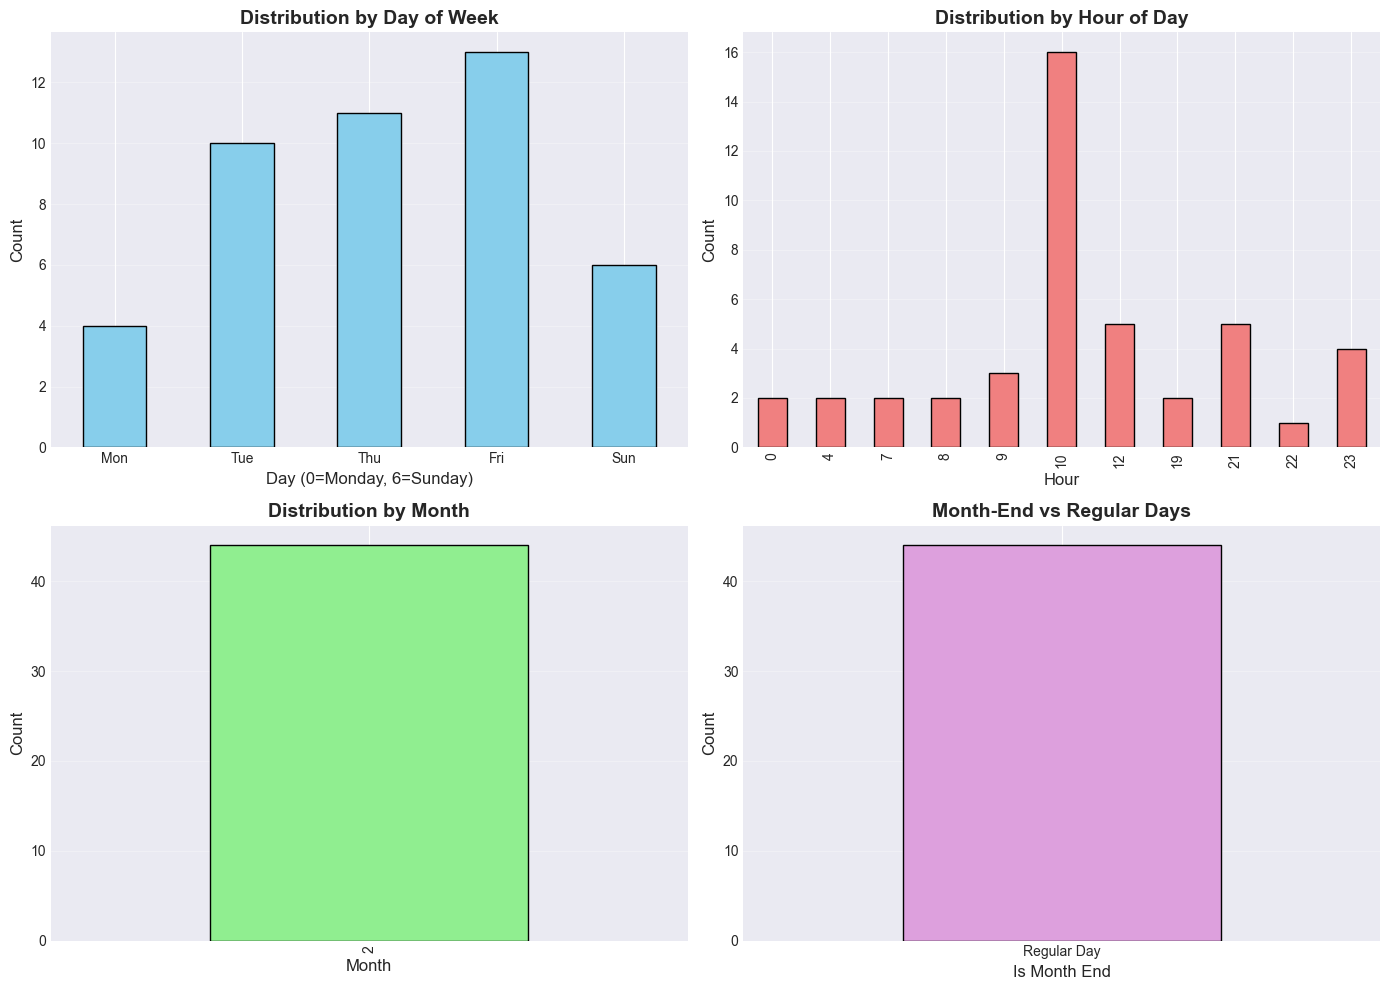


✅ Visualization saved to: results/features/temporal_features.png


In [9]:
print("\n" + "=" * 80)
print("EXERCISE 2.2: Visualize Temporal Feature Distributions")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Day of week distribution
day_counts = df['day_of_week_encoded'].value_counts().sort_index()
day_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Day (0=Monday, 6=Sunday)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Set labels only for days that exist in the data
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
existing_labels = [day_names[int(day)] for day in day_counts.index]
axes[0, 0].set_xticklabels(existing_labels, rotation=0)
axes[0, 0].grid(alpha=0.3, axis='y')

# Hour distribution
df['hour_of_day'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0, 1], color='lightcoral', edgecolor='black'
)
axes[0, 1].set_title('Distribution by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Hour', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].grid(alpha=0.3, axis='y')

# Month distribution
df['month'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black'
)
axes[1, 0].set_title('Distribution by Month', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].grid(alpha=0.3, axis='y')

# Month-end indicator
month_end_counts = df['is_month_end'].value_counts().sort_index()
month_end_counts.plot(kind='bar', ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Month-End vs Regular Days', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Is Month End', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# Set labels dynamically based on what exists
month_end_labels = []
for val in month_end_counts.index:
    month_end_labels.append('Month End' if val == 1 else 'Regular Day')
axes[1, 1].set_xticklabels(month_end_labels, rotation=0)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/features/temporal_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/features/temporal_features.png")

In [10]:
print("\n" + "=" * 80)
print("📚 PART 3: PATTERN FEATURE ENGINEERING")
print("=" * 80)


📚 PART 3: PATTERN FEATURE ENGINEERING


In [11]:
print("\n" + "=" * 80)
print("EXERCISE 3.1: Calculate Pattern-Based Features")
print("=" * 80)

# Initialize pattern features
pattern_features = []

for idx, row in df.iterrows():
    activity_id = row['activity_id']
    day_of_week = row['day_of_week_encoded']
    
    # Get all historical records for this activity
    activity_history = df[df['activity_id'] == activity_id]
    
    # 1. Total occurrences
    total_occurrences = len(activity_history)
    
    # 2. Activity frequency on this day of week
    same_day_history = activity_history[activity_history['day_of_week_encoded'] == day_of_week]
    total_days_of_week = len(df[df['day_of_week_encoded'] == day_of_week])
    activity_frequency = len(same_day_history) / max(total_days_of_week, 1)
    
    # 3. Average duration
    avg_duration = activity_history['total_hours'].mean()
    
    # 4. Duration consistency (1 - coefficient of variation)
    std_duration = activity_history['total_hours'].std()
    if pd.notna(std_duration) and avg_duration > 0:
        duration_consistency = 1 - (std_duration / avg_duration)
        duration_consistency = max(0, min(1, duration_consistency))  # Clip to [0, 1]
    else:
        duration_consistency = 1.0 if total_occurrences == 1 else 0.0
    
    # 5. Recent trend (last week vs previous)
    current_date = row['log_date']
    week_ago = current_date - timedelta(days=7)
    
    recent_count = len(activity_history[activity_history['log_date'] >= week_ago])
    older_count = len(activity_history[activity_history['log_date'] < week_ago])
    
    if older_count > 0:
        recent_trend = (recent_count - older_count) / older_count
    else:
        recent_trend = 0.0
    
    pattern_features.append({
        'total_occurrences': total_occurrences,
        'activity_frequency': round(activity_frequency, 4),
        'avg_duration': round(avg_duration, 4),
        'duration_consistency': round(duration_consistency, 4),
        'recent_trend': round(recent_trend, 4)
    })

# Add pattern features to dataframe
pattern_df = pd.DataFrame(pattern_features)
df = pd.concat([df, pattern_df], axis=1)

print("\n✅ Pattern features calculated!")
print("=" * 80)

print("\n📊 PATTERN FEATURES SUMMARY:")
print("=" * 80)
print(df[['activity_name', 'total_occurrences', 'activity_frequency', 
         'avg_duration', 'duration_consistency', 'recent_trend']].describe().round(4))

print("\n📋 SAMPLE PATTERN FEATURES:")
print("=" * 80)
df[['activity_name', 'day_of_week', 'activity_frequency', 'duration_consistency', 'recent_trend']].head(10)


EXERCISE 3.1: Calculate Pattern-Based Features

✅ Pattern features calculated!

📊 PATTERN FEATURES SUMMARY:
       total_occurrences  activity_frequency  avg_duration  \
count            44.0000             44.0000       44.0000   
mean              8.6364              0.2452       25.4952   
std               3.9947              0.1084        6.2808   
min               1.0000              0.0769       17.1438   
25%               6.0000              0.1667       22.4628   
50%               7.5000              0.2308       23.6393   
75%              14.0000              0.3333       30.7583   
max              14.0000              0.5000       48.0400   

       duration_consistency  recent_trend  
count               44.0000          44.0  
mean                 0.4638           0.0  
std                  0.1220           0.0  
min                  0.3811           0.0  
25%                  0.3991           0.0  
50%                  0.4142           0.0  
75%                  0.4

,activity_name,day_of_week,activity_frequency,duration_consistency,recent_trend
0,Development,Tuesday,0.4000,0.3991,0.0
1,Meeting,Thursday,0.3636,0.4142,0.0
2,Development,Thursday,0.2727,0.3991,0.0
3,Email,Thursday,0.0909,0.5011,0.0
4,Meeting,Thursday,0.3636,0.4142,0.0
5,Break,Thursday,0.1818,0.3811,0.0
6,Meeting,Thursday,0.3636,0.4142,0.0
7,Development,Thursday,0.2727,0.3991,0.0
8,Development,Thursday,0.2727,0.3991,0.0
9,Meeting,Thursday,0.3636,0.4142,0.0



EXERCISE 3.2: Visualize Pattern Feature Distributions


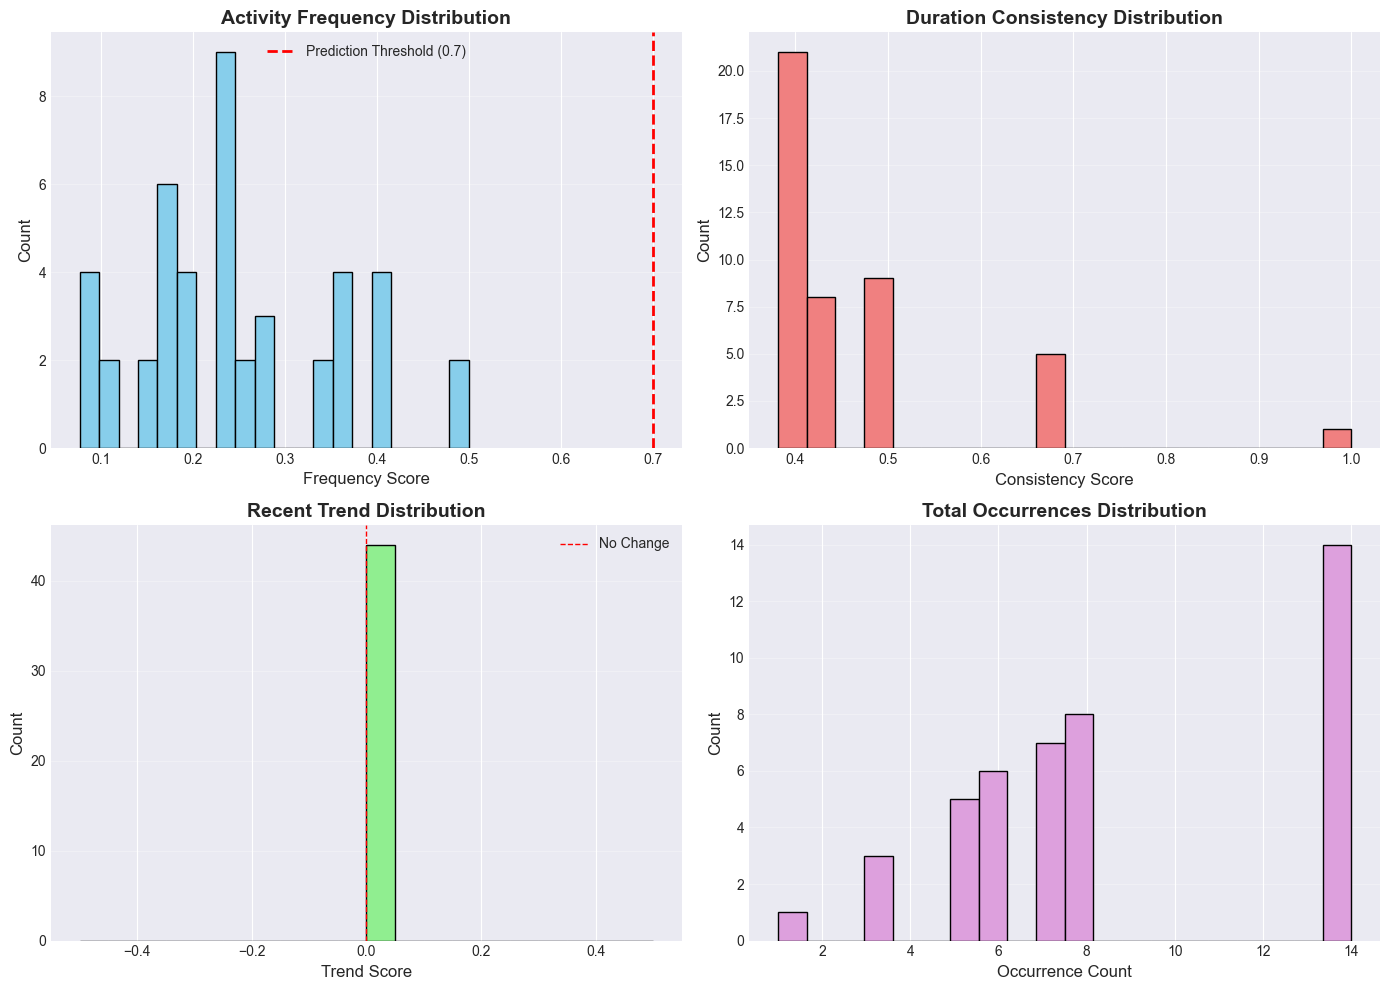


✅ Visualization saved to: results/features/pattern_features.png

💡 PATTERN FEATURE INSIGHTS:
High Frequency Activities (≥0.7): 0 (0.0%)
High Consistency Activities (≥0.7): 1 (2.3%)
Increasing Trend Activities: 0 (0.0%)


In [12]:
print("\n" + "=" * 80)
print("EXERCISE 3.2: Visualize Pattern Feature Distributions")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Activity frequency distribution
axes[0, 0].hist(df['activity_frequency'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Activity Frequency Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Frequency Score', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].grid(alpha=0.3, axis='y')
axes[0, 0].axvline(0.7, color='red', linestyle='--', linewidth=2, label='Prediction Threshold (0.7)')
axes[0, 0].legend()

# Duration consistency distribution
axes[0, 1].hist(df['duration_consistency'], bins=20, edgecolor='black', color='lightcoral')
axes[0, 1].set_title('Duration Consistency Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Consistency Score', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].grid(alpha=0.3, axis='y')

# Recent trend distribution
axes[1, 0].hist(df['recent_trend'], bins=20, edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Recent Trend Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Trend Score', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].grid(alpha=0.3, axis='y')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=1, label='No Change')
axes[1, 0].legend()

# Total occurrences distribution
axes[1, 1].hist(df['total_occurrences'], bins=20, edgecolor='black', color='plum')
axes[1, 1].set_title('Total Occurrences Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Occurrence Count', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/features/pattern_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/features/pattern_features.png")

print("\n💡 PATTERN FEATURE INSIGHTS:")
print("=" * 80)
high_freq = len(df[df['activity_frequency'] >= 0.7])
print(f"High Frequency Activities (≥0.7): {high_freq} ({(high_freq/len(df)*100):.1f}%)")
high_consistency = len(df[df['duration_consistency'] >= 0.7])
print(f"High Consistency Activities (≥0.7): {high_consistency} ({(high_consistency/len(df)*100):.1f}%)")
increasing_trend = len(df[df['recent_trend'] > 0])
print(f"Increasing Trend Activities: {increasing_trend} ({(increasing_trend/len(df)*100):.1f}%)")

In [13]:
print("\n" + "=" * 80)
print("📚 PART 4: FEATURE ENCODING & NORMALIZATION")
print("=" * 80)


📚 PART 4: FEATURE ENCODING & NORMALIZATION


In [14]:
print("\n" + "=" * 80)
print("EXERCISE 4.1: Encode Categorical Features")
print("=" * 80)

# Encode user_id
le_user = LabelEncoder()
df['user_id_encoded'] = le_user.fit_transform(df['user_id'])

print("\n✅ Categorical features encoded!")
print("=" * 80)

print("\n📊 ENCODING SUMMARY:")
print("=" * 80)
print(f"Original user_id values: {df['user_id'].nunique()}")
print(f"Encoded user_id range: {df['user_id_encoded'].min()} to {df['user_id_encoded'].max()}")

print("\n📋 ENCODING MAPPING (First 5):")
print("=" * 80)
user_mapping = df[['user_id', 'user_id_encoded']].drop_duplicates().head()
print(user_mapping.to_string(index=False))


EXERCISE 4.1: Encode Categorical Features

✅ Categorical features encoded!

📊 ENCODING SUMMARY:
Original user_id values: 4
Encoded user_id range: 0 to 3

📋 ENCODING MAPPING (First 5):
user_id  user_id_encoded
      1                0
  emp02                2
  emp03                3
  emp01                1



EXERCISE 4.2: Create Target Variable

✅ Target variable created (threshold: 0.2308)!
   Using MEDIAN frequency to ensure balanced classes

🎯 TARGET DISTRIBUTION:
Should NOT Predict (0): 18 (40.9%)
Should Predict (1): 26 (59.1%)


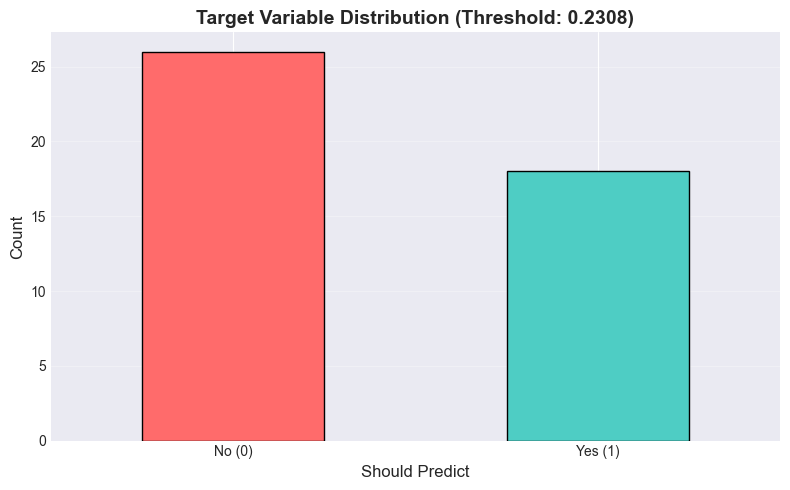


✅ Visualization saved to: results/features/target_distribution.png

💡 TARGET BALANCE:
⚠️ Dataset is SLIGHTLY IMBALANCED but acceptable for training
   Ratio (1:0): 1.44

📊 FREQUENCY DISTRIBUTION:
Min frequency: 0.0769
25th percentile: 0.1667
50th percentile (median): 0.2308 ← THRESHOLD
75th percentile: 0.3333
Max frequency: 0.5000

💡 INTERPRETATION:
Activities with frequency ≥ 0.2308 will be predicted
This represents the top 50% most frequent activities


In [17]:
print("\n" + "=" * 80)
print("EXERCISE 4.2: Create Target Variable")
print("=" * 80)

# Use median frequency as threshold for small dataset
# This ensures ~50% positive and ~50% negative examples
FREQUENCY_THRESHOLD = df['activity_frequency'].median()

df['should_predict'] = (df['activity_frequency'] >= FREQUENCY_THRESHOLD).astype(int)

print(f"\n✅ Target variable created (threshold: {FREQUENCY_THRESHOLD:.4f})!")
print("   Using MEDIAN frequency to ensure balanced classes")
print("=" * 80)

print("\n🎯 TARGET DISTRIBUTION:")
print("=" * 80)
target_counts = df['should_predict'].value_counts()
print(f"Should NOT Predict (0): {target_counts.get(0, 0)} ({(target_counts.get(0, 0)/len(df)*100):.1f}%)")
print(f"Should Predict (1): {target_counts.get(1, 0)} ({(target_counts.get(1, 0)/len(df)*100):.1f}%)")

# Visualize
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar', color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
plt.title(f'Target Variable Distribution (Threshold: {FREQUENCY_THRESHOLD:.4f})', fontsize=14, fontweight='bold')
plt.xlabel('Should Predict', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'], rotation=0)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../results/features/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/features/target_distribution.png")

print("\n💡 TARGET BALANCE:")
print("=" * 80)

if target_counts.get(0, 0) > 0 and target_counts.get(1, 0) > 0:
    balance_ratio = target_counts.get(1, 0) / target_counts.get(0, 0)
    if balance_ratio > 0.8 and balance_ratio < 1.2:
        print("✅ Dataset is BALANCED (ratio close to 1:1)")
        print(f"   Ratio (1:0): {balance_ratio:.2f}")
    elif balance_ratio > 0.5 and balance_ratio < 2.0:
        print("⚠️ Dataset is SLIGHTLY IMBALANCED but acceptable for training")
        print(f"   Ratio (1:0): {balance_ratio:.2f}")
    else:
        print("❌ Dataset is IMBALANCED")
        print(f"   Ratio (1:0): {balance_ratio:.2f}")
        print("   Recommendation: Use class_weight='balanced' in Random Forest")
else:
    print("❌ TARGET CREATION FAILED - Check frequency distribution")

print("\n📊 FREQUENCY DISTRIBUTION:")
print("=" * 80)
print(f"Min frequency: {df['activity_frequency'].min():.4f}")
print(f"25th percentile: {df['activity_frequency'].quantile(0.25):.4f}")
print(f"50th percentile (median): {df['activity_frequency'].quantile(0.50):.4f} ← THRESHOLD")
print(f"75th percentile: {df['activity_frequency'].quantile(0.75):.4f}")
print(f"Max frequency: {df['activity_frequency'].max():.4f}")

print("\n💡 INTERPRETATION:")
print("=" * 80)
print(f"Activities with frequency ≥ {FREQUENCY_THRESHOLD:.4f} will be predicted")
print(f"This represents the top 50% most frequent activities")

In [18]:
print("\n" + "=" * 80)
print("📚 PART 5: DATASET CREATION & EXPORT")
print("=" * 80)


📚 PART 5: DATASET CREATION & EXPORT


In [19]:
print("\n" + "=" * 80)
print("EXERCISE 5.1: Select Final Feature Set")
print("=" * 80)

# Define final feature columns for ML
feature_columns = [
    # Temporal features
    'day_of_week_encoded',
    'hour_of_day',
    'month',
    'is_month_end',
    
    # Pattern features
    'activity_frequency',
    'avg_duration',
    'duration_consistency',
    'recent_trend',
    'total_occurrences',
    
    # Contextual features
    'is_billable',
    'activity_id',
    'user_id_encoded'
]

target_column = 'should_predict'

# Create final dataset
X = df[feature_columns].copy()
y = df[target_column].copy()

print("\n✅ Feature set defined!")
print("=" * 80)

print("\n📊 FINAL FEATURE SET:")
print("=" * 80)
print(f"Total Features: {len(feature_columns)}")
print(f"Target Variable: {target_column}")

print("\n📋 FEATURE LIST:")
print("=" * 80)
for i, feat in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feat}")

print("\n📈 FEATURE STATISTICS:")
print("=" * 80)
print(X.describe().round(4))


EXERCISE 5.1: Select Final Feature Set

✅ Feature set defined!

📊 FINAL FEATURE SET:
Total Features: 12
Target Variable: should_predict

📋 FEATURE LIST:
 1. day_of_week_encoded
 2. hour_of_day
 3. month
 4. is_month_end
 5. activity_frequency
 6. avg_duration
 7. duration_consistency
 8. recent_trend
 9. total_occurrences
10. is_billable
11. activity_id
12. user_id_encoded

📈 FEATURE STATISTICS:
       day_of_week_encoded  hour_of_day  month  is_month_end  \
count              44.0000      44.0000   44.0          44.0   
mean                2.9773      12.3182    2.0           0.0   
std                 1.8235       6.2348    0.0           0.0   
min                 0.0000       0.0000    2.0           0.0   
25%                 1.0000       9.7500    2.0           0.0   
50%                 3.0000      10.0000    2.0           0.0   
75%                 4.0000      19.0000    2.0           0.0   
max                 6.0000      23.0000    2.0           0.0   

       activity_frequen

In [20]:
print("\n" + "=" * 80)
print("EXERCISE 5.2: Save Processed Dataset")
print("=" * 80)

# Combine features and target
final_dataset = X.copy()
final_dataset['target'] = y

# Save to CSV
output_path = '../data/processed/features_engineered.csv'
final_dataset.to_csv(output_path, index=False)

print(f"\n✅ Dataset saved to: {output_path}")
print("=" * 80)

print("\n📊 SAVED DATASET INFO:")
print("=" * 80)
print(f"Total Rows: {len(final_dataset)}")
print(f"Total Columns: {len(final_dataset.columns)}")
print(f"Features: {len(feature_columns)}")
print(f"Target: 1 column ({target_column})")
print(f"File Size: {os.path.getsize(output_path) / 1024:.2f} KB")

print("\n📋 SAMPLE OF SAVED DATA:")
print("=" * 80)
final_dataset.head(10)


EXERCISE 5.2: Save Processed Dataset

✅ Dataset saved to: ../data/processed/features_engineered.csv

📊 SAVED DATASET INFO:
Total Rows: 44
Total Columns: 13
Features: 12
Target: 1 column (should_predict)
File Size: 2.10 KB

📋 SAMPLE OF SAVED DATA:


,day_of_week_encoded,hour_of_day,month,is_month_end,activity_frequency,avg_duration,duration_consistency,recent_trend,total_occurrences,is_billable,activity_id,user_id_encoded,target
0,1,23,2,0,0.4000,23.6393,0.3991,0.0,14,1,1,0,1
1,3,10,2,0,0.3636,17.1438,0.4142,0.0,8,1,2,2,1
2,3,21,2,0,0.2727,23.6393,0.3991,0.0,14,1,1,3,1
3,3,12,2,0,0.0909,18.9333,0.5011,0.0,3,0,5,1,0
4,3,12,2,0,0.3636,17.1438,0.4142,0.0,8,1,2,1,1
5,3,12,2,0,0.1818,29.9600,0.3811,0.0,7,0,6,1,0
6,3,12,2,0,0.3636,17.1438,0.4142,0.0,8,1,2,1,1
7,3,12,2,0,0.2727,23.6393,0.3991,0.0,14,1,1,1,1
8,3,10,2,0,0.2727,23.6393,0.3991,0.0,14,1,1,2,1
9,3,10,2,0,0.3636,17.1438,0.4142,0.0,8,1,2,2,1



EXERCISE 5.3: Feature Correlation with Target

📊 FEATURE CORRELATION WITH TARGET:
activity_frequency            : +0.7506
total_occurrences             : +0.6257
is_billable                   : +0.4743
user_id_encoded               : +0.0460
day_of_week_encoded           : -0.1131
hour_of_day                   : -0.1370
avg_duration                  : -0.3359
duration_consistency          : -0.4857
activity_id                   : -0.6026
month                         : +nan
is_month_end                  : +nan
recent_trend                  : +nan


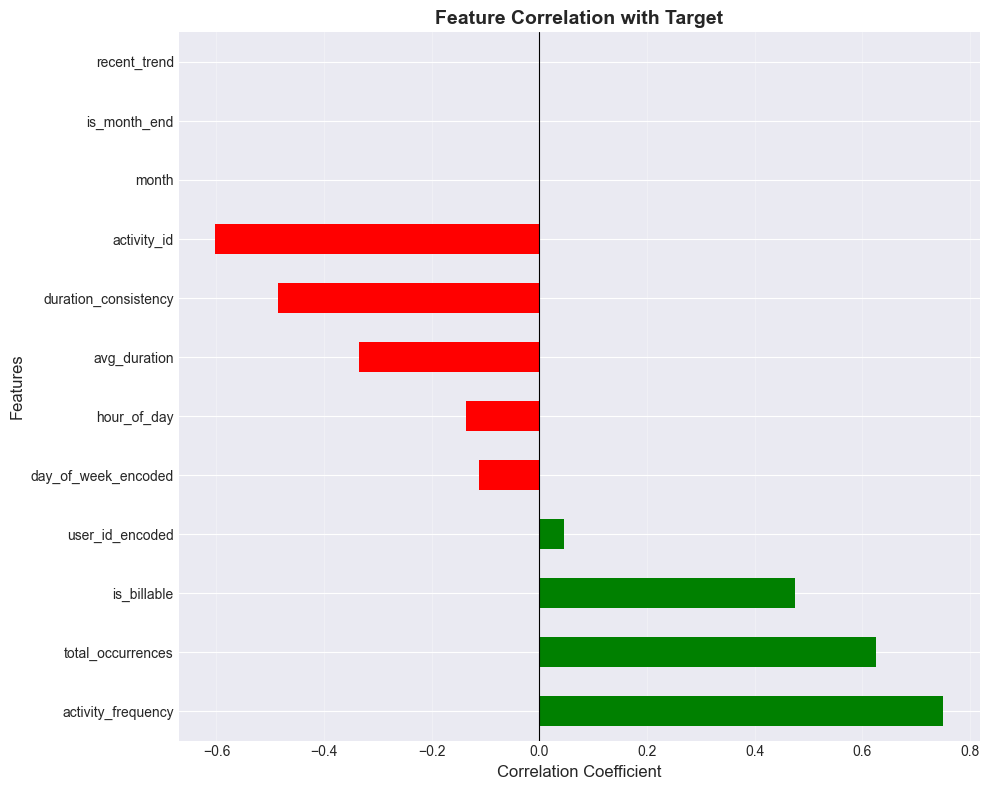


✅ Visualization saved to: results/features/feature_correlations.png

💡 CORRELATION INSIGHTS:

Top 3 Positive Correlations:
   • activity_frequency: +0.7506
   • total_occurrences: +0.6257
   • is_billable: +0.4743

Top 3 Negative Correlations:
   • month: +nan
   • is_month_end: +nan
   • recent_trend: +nan


In [21]:
print("\n" + "=" * 80)
print("EXERCISE 5.3: Feature Correlation with Target")
print("=" * 80)

# Calculate correlation with target
correlations = X.corrwith(y).sort_values(ascending=False)

print("\n📊 FEATURE CORRELATION WITH TARGET:")
print("=" * 80)
for feat, corr in correlations.items():
    print(f"{feat:30s}: {corr:+.4f}")

# Visualize
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlations])
plt.title('Feature Correlation with Target', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/features/feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/features/feature_correlations.png")

print("\n💡 CORRELATION INSIGHTS:")
print("=" * 80)
top_positive = correlations.head(3)
print("\nTop 3 Positive Correlations:")
for feat, corr in top_positive.items():
    print(f"   • {feat}: {corr:+.4f}")

if (correlations < 0).any():
    top_negative = correlations.tail(3)
    print("\nTop 3 Negative Correlations:")
    for feat, corr in top_negative.items():
        print(f"   • {feat}: {corr:+.4f}")
        

In [22]:
print("\n" + "=" * 80)
print("🎯 PHASE 2 - FEATURE ENGINEERING COMPLETE!")
print("=" * 80)

print("""
📚 WHAT I ACCOMPLISHED TODAY:

✅ PART 1: Data Loading & Planning
   • Loaded 44 timesheet records
   • Defined 14 ML features to engineer

✅ PART 2: Temporal Feature Engineering
   • Extracted day_of_week, hour, month features
   • Created month-end indicator
   • Generated temporal visualizations

✅ PART 3: Pattern Feature Engineering
   • Calculated activity frequency scores
   • Measured duration consistency
   • Computed recent trend indicators
   • Counted total occurrences

✅ PART 4: Feature Encoding
   • Encoded categorical user_id
   • Created binary target variable
   • Analyzed target distribution

✅ PART 5: Dataset Creation
   • Selected 12 final features
   • Combined with target variable
   • Saved to features_engineered.csv
   • Analyzed feature-target correlations

📊 FEATURE ENGINEERING SUMMARY:
""" + f"""
   • Total Features: {len(feature_columns)}
   • Total Records: {len(X)}
   • Target Balance: {(y.sum()/len(y)*100):.1f}% positive class
   • Saved Dataset: data/processed/features_engineered.csv

💾 FILES CREATED TODAY:
   • data/processed/features_engineered.csv
   • results/features/temporal_features.png
   • results/features/pattern_features.png
   • results/features/target_distribution.png
   • results/features/feature_correlations.png

🎯 NEXT STEPS:

PHASE 3 - Random Forest Training:
   1. Load engineered features
   2. Split train/test sets (70/30)
   3. Train Random Forest classifier
   4. Evaluate prediction accuracy
   5. Analyze feature importance
   6. Save trained model

📈 FEATURES READY FOR ML:
   ✅ Temporal: day_of_week, hour, month, is_month_end
   ✅ Pattern: frequency, consistency, trend, occurrences
   ✅ Context: is_billable, activity_id, user_id
   ✅ Target: should_predict (binary)

🔜 NEXT NOTEBOOK: 03_model_training.ipynb
   Focus: Train and evaluate Random Forest model
""")

print("=" * 80)
print("✅ Phase 2 Feature Engineering Complete!")
print("🚀 Ready to proceed to Model Training!")
print("=" * 80)


🎯 PHASE 2 - FEATURE ENGINEERING COMPLETE!

📚 WHAT I ACCOMPLISHED TODAY:

✅ PART 1: Data Loading & Planning
   • Loaded 44 timesheet records
   • Defined 14 ML features to engineer

✅ PART 2: Temporal Feature Engineering
   • Extracted day_of_week, hour, month features
   • Created month-end indicator
   • Generated temporal visualizations

✅ PART 3: Pattern Feature Engineering
   • Calculated activity frequency scores
   • Measured duration consistency
   • Computed recent trend indicators
   • Counted total occurrences

✅ PART 4: Feature Encoding
   • Encoded categorical user_id
   • Created binary target variable
   • Analyzed target distribution

✅ PART 5: Dataset Creation
   • Selected 12 final features
   • Combined with target variable
   • Saved to features_engineered.csv
   • Analyzed feature-target correlations

📊 FEATURE ENGINEERING SUMMARY:

   • Total Features: 12
   • Total Records: 44
   • Target Balance: 59.1% positive class
   • Saved Dataset: data/processed/features_e